# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

#### Student Name: ****Brett Vrtachnik****

Repo: [Module 6 Web Scraping Repo](https://github.com/bvrtachnik/620-mod6-web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Imports

In [232]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.7.14
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.3
confection                0.1.5
contourpy                 1.3.3
cycler                    0.12.1
cymem                     2.0.11
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing     

#### 1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [233]:
# Define the URL to scrape
url = 'https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/'

# Send a GET request to fetch the contents of the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text

    # Save the HTML content to a .pkl file
    with open('article_content.pkl', 'wb') as file:
        pickle.dump(html_content, file)
    
    print("HTML content saved to 'article_content.pkl'")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")



HTML content saved to 'article_content.pkl'


#### 2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [234]:
# Load the HTML content from the .pkl file
with open('article_content.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract only the main article body to avoid pulling in comments or side content
article_div = soup.find('div', class_='entry-content')

# If article content is found, extract and print it
if article_div:
    article_text = article_div.get_text(separator='\n')  # Preserve newlines for readability
    print(article_text)
else:
    print("Main article content not found.")



When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.


Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!




Laser Headlights?!


BWM’s prototype laser headlight assemblies undergoing testing.


The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work

#### 3. Load the article text into a trained `spaCy` pipeline, and **determine the 5 most frequent tokens** (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [235]:
# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

# Extract only the article content (not comments)
article_div = soup.find('div', class_='entry-content')
doc = nlp(article_div.get_text())

# Count valid tokens (lowercased, excluding stopwords, punctuation, spaces)
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Get token frequencies
token_freq = Counter(tokens)

# Top 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print results
print("\nTop 5 most common tokens (excluding stopwords, punctuation, whitespace):\n")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")



Top 5 most common tokens (excluding stopwords, punctuation, whitespace):

Token: laser, Frequency: 30
Token: headlights, Frequency: 17
Token: technology, Frequency: 10
Token: headlight, Frequency: 10
Token: led, Frequency: 10


#### 4. Load the article text into a trained `spaCy` pipeline, and **determine the 5 most frequent lemmas** (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [236]:
# Load the spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Run the article content through the spaCy pipeline (excluding comments)
article_div = soup.find('div', class_='entry-content')
doc = nlp(article_div.get_text())

# Extract lemmas in lowercase, excluding stopwords, punctuation, and whitespace
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequency of each lemma
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the results
print("\nTop 5 most common lemmas (excluding stopwords, punctuation, whitespace):\n")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")



Top 5 most common lemmas (excluding stopwords, punctuation, whitespace):

Lemma: laser, Frequency: 35
Lemma: headlight, Frequency: 26
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: led, Frequency: 10


#### 5. Define the following methods:

* `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting tokens and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
* `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence

You may find some of the code from the in-class notes useful; feel free to use methods (rewrite them in this cell as well). Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.


In [237]:
# Get the first non-blank sentence
first_sentence = [sent for sent in doc.sents if sent.text.strip()][0]

# Get top 5 tokens and lemmas
top_tokens = [token.lower() for token, _ in most_common_tokens[:5]]
top_lemmas = [lemma.lower() for lemma, _ in most_common_lemmas[:5]]

# Score by token
def score_by_token(sent, keywords):
    words = [t.text.lower() for t in sent]
    matches = [w for w in words if w in keywords]
    return len(matches) / len(words) if words else 0

# Score by lemma
def score_by_lemma(sent, lemmas):
    lems = [t.lemma_.lower() for t in sent]
    matches = [l for l in lems if l in lemmas]
    return len(matches) / len(lems) if lems else 0

# Print results
print("First sentence:", first_sentence.text)
print("Token score:", score_by_token(first_sentence, top_tokens))
print("Lemma score:", score_by_lemma(first_sentence, top_lemmas))


First sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Token score: 0.08695652173913043
Lemma score: 0.08695652173913043


#### 6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

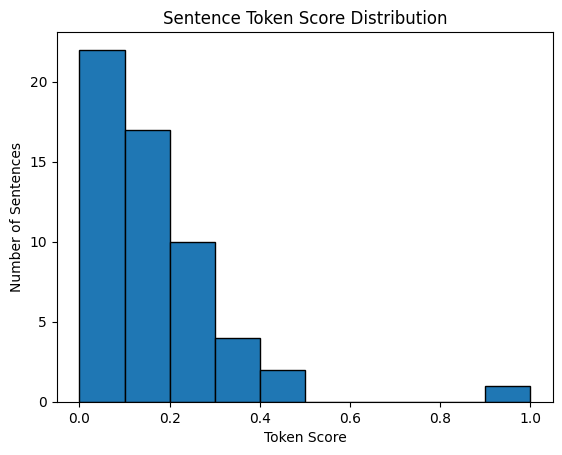

In [238]:
# Get the most common tokens (filtered)
tokens = [token.text.lower() for token in nlp(article_text)
          if not token.is_stop and not token.is_punct and not token.is_space]
token_counts = Counter(tokens)
most_common_tokens = {token for token, _ in token_counts.most_common(5)}

# Function to score sentences by token
def score_by_token(sentence, interesting_tokens):
    words = [token.text.lower() for token in sentence
             if not token.is_stop and not token.is_punct and not token.is_space]
    if not words:
        return 0
    matches = sum(1 for word in words if word in interesting_tokens)
    return matches / len(words)

# Score every sentence
doc = nlp(article_text)
sentence_scores = [score_by_token(sent, most_common_tokens) for sent in doc.sents]

# Plot the histogram
plt.hist(sentence_scores, bins=10, edgecolor='black')
plt.title("Sentence Token Score Distribution")
plt.xlabel("Token Score")
plt.ylabel("Number of Sentences")
plt.show()

# The most common range of scores appears to be around 0.0–0.1 based on the histogram.


#### 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

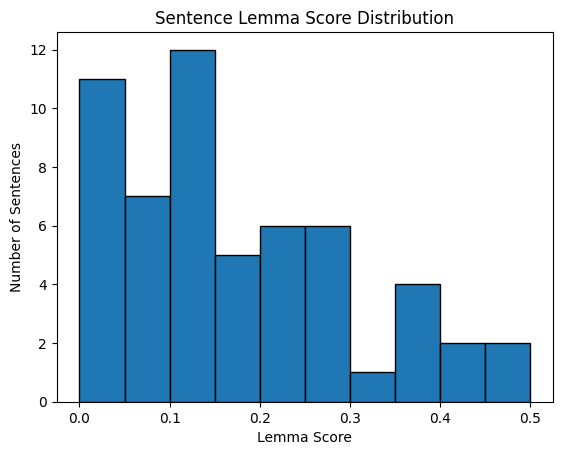

In [239]:
# Get the most common lemmas (filtered)
lemmas = [token.lemma_.lower() for token in nlp(article_text)
          if not token.is_stop and not token.is_punct and not token.is_space]
lemma_counts = Counter(lemmas)
most_common_lemmas = {lemma for lemma, _ in lemma_counts.most_common(5)}

# Function to score sentences by lemma
def score_by_lemma(sentence, interesting_lemmas):
    words = [token.lemma_.lower() for token in sentence
             if not token.is_stop and not token.is_punct and not token.is_space]
    if not words:
        return 0
    matches = sum(1 for word in words if word in interesting_lemmas)
    return matches / len(words)

# Score every sentence
doc = nlp(article_text)
sentence_scores = [score_by_lemma(sent, most_common_lemmas) for sent in doc.sents]

# Plot the histogram
plt.hist(sentence_scores, bins=10, edgecolor='black')
plt.title("Sentence Lemma Score Distribution")
plt.xlabel("Lemma Score")
plt.ylabel("Number of Sentences")
plt.show()

# The most common range of scores appears to be around 0.0–0.1 based on the histogram.

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).